# Using OSMnx for Route Optimization
## Justin A. Gould

# Required Packages

In [1]:
#General
import requests
import folium
import polyline
import networkx as nx
import osmnx as ox
import folium
import osmread
from pathlib import Path
import requests

### GPS

In [2]:
#OSMnx Config
ox.config(use_cache=True, log_console=True)

#Get Graph of USA
G = ox.graph_from_xml("./Data/ann_arbor.xml")

In [3]:
#Define Origin and Destination from Multiple Sources------
#GPS Point
origin_node =  ox.distance.get_nearest_node(G, (42.279816,-83.7423991)) 
destination_node =  ox.distance.get_nearest_node(G, (42.2682423,-83.7417295))

C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


In [4]:
#The route is then found as the shortest path between those nodes over the graph representation:
route = nx.shortest_path(G, origin_node, destination_node)

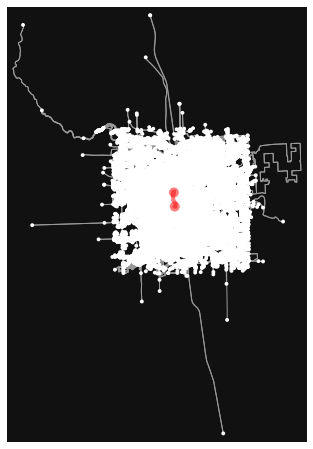

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [5]:
#Map Route
ox.plot_graph_route(G, route)

In [6]:
#Map Folium
ox.plot_route_folium(G, route, route_width=3, route_color='#AA1111',
                     tiles='openstreetmap', popup_attribute='name')

C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\folium.py:126: UserWarning: `route_color` has been deprecated and will be removed: use kwargs instead
  warn("`route_color` has been deprecated and will be removed: use kwargs instead")
C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\folium.py:129: UserWarning: `route_width` has been deprecated and will be removed: use kwargs instead
  warn("`route_width` has been deprecated and will be removed: use kwargs instead")


### Addresses

In [7]:
#Define Origin and Destination from Multiple Sources------
#Addresses
origin = ox.geometries.geometries_from_address("701 S State St, Ann Arbor, MI 48104", tags={"amenity":True})
destination = ox.geometries.geometries_from_address("950 Victors Way, Ann Arbor, MI 48108", tags={"amenity":True})

C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\gould\.c

In [8]:
origin["geometry"]

element_type  osmid    
node          342992451                           POINT (-83.74304 42.27869)
              542781591                           POINT (-83.74570 42.28165)
              560917683                           POINT (-83.73485 42.27482)
              695043656                           POINT (-83.74839 42.27837)
              748964467                           POINT (-83.74112 42.27797)
                                                 ...                        
way           992014306    POLYGON ((-83.73880 42.27988, -83.73879 42.279...
              992014307    POLYGON ((-83.73880 42.27975, -83.73878 42.279...
              995423516    POLYGON ((-83.73677 42.27713, -83.73677 42.277...
relation      3990210      MULTIPOLYGON (((-83.67688 42.30411, -83.67690 ...
              3999761      POLYGON ((-83.72875 42.28233, -83.72870 42.282...
Name: geometry, Length: 816, dtype: geometry

In [9]:
#Get Closest Point
origin_point = tuple((lambda x: float(x))(x) for x in str(origin["geometry"][0]).replace("POINT (", "").replace(")", "").split(" "))[::-1]
destination_point = tuple((lambda x: float(x))(x) for x in str(destination["geometry"][0]).replace("POINT (", "").replace(")", "").split(" "))[::-1]

In [10]:
#To Node
origin_node =  ox.distance.get_nearest_node(G, origin_point) 
destination_node =  ox.distance.get_nearest_node(G, destination_point)

C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


In [11]:
#The route is then found as the shortest path between those nodes over the graph representation:
route = nx.shortest_path(G, origin_node, destination_node)

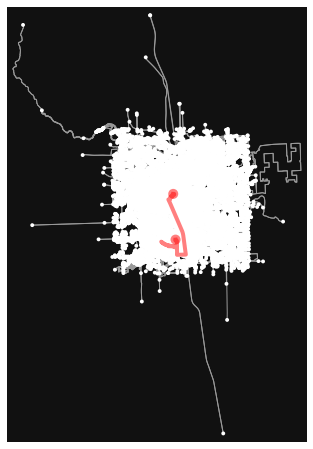

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [12]:
#Map Route
ox.plot_graph_route(G, route)

In [13]:
#Map Folium
ox.plot_route_folium(G, route, route_width=3, route_color='#AA1111',
                     tiles='openstreetmap', popup_attribute='name')

C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\folium.py:126: UserWarning: `route_color` has been deprecated and will be removed: use kwargs instead
  warn("`route_color` has been deprecated and will be removed: use kwargs instead")
C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\folium.py:129: UserWarning: `route_width` has been deprecated and will be removed: use kwargs instead
  warn("`route_width` has been deprecated and will be removed: use kwargs instead")


### POI

In [14]:
#Define Origin and Destination from Multiple Sources------
#Addresses
origin = ox.geometries.geometries_from_place("Briarwood Mall, Ann Arbor, MI", tags={"amenity":True, "landuse":["retail","commercial"], "highway":"bus_stop"})
destination = ox.geometries.geometries_from_place("Ann Arbor, MI CVS Pharmacy", tags={"amenity":True, "landuse":["retail","commercial"], "highway":"bus_stop"})

C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over 

In [15]:
origin["geometry"]

element_type  osmid     
node          3462553020    POINT (-83.74659 42.24046)
              4119866393    POINT (-83.74656 42.24015)
              4119866401    POINT (-83.74495 42.24061)
              4119866404    POINT (-83.74528 42.24067)
              4119866405    POINT (-83.74794 42.24065)
              4119866416    POINT (-83.74526 42.24045)
              4119866443    POINT (-83.74801 42.24048)
              4119866446    POINT (-83.74764 42.24122)
              4119866461    POINT (-83.74715 42.23969)
Name: geometry, dtype: geometry

In [16]:
#Get Closest Point
origin_point = tuple((lambda x: float(x))(x) for x in str(origin["geometry"][0]).replace("POINT (", "").replace(")", "").split(" "))[::-1]
destination_point = tuple((lambda x: float(x))(x) for x in str(destination["geometry"][0]).replace("POINT (", "").replace(")", "").split(" "))[::-1]

In [17]:
#To Node
origin_node =  ox.distance.get_nearest_node(G, origin_point) 
destination_node =  ox.distance.get_nearest_node(G, destination_point)

C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


In [18]:
#The route is then found as the shortest path between those nodes over the graph representation:
route = nx.shortest_path(G, origin_node, destination_node)

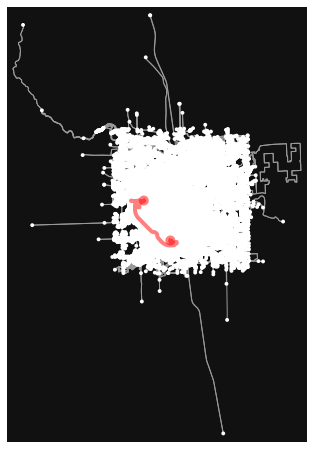

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [19]:
#Map Route
ox.plot_graph_route(G, route)

In [20]:
#Map Folium
ox.plot_route_folium(G, route, route_width=3, route_color='#AA1111',
                     tiles='openstreetmap', popup_attribute='name')

C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\folium.py:126: UserWarning: `route_color` has been deprecated and will be removed: use kwargs instead
  warn("`route_color` has been deprecated and will be removed: use kwargs instead")
C:\Users\gould\.conda\envs\ox\lib\site-packages\osmnx\folium.py:129: UserWarning: `route_width` has been deprecated and will be removed: use kwargs instead
  warn("`route_width` has been deprecated and will be removed: use kwargs instead")
